/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


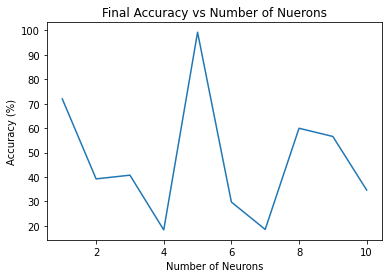

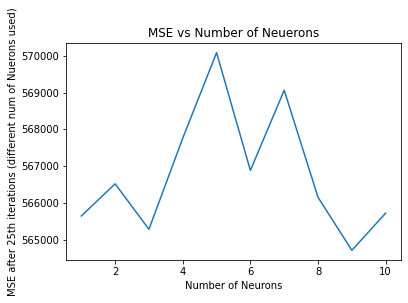

In [11]:
#Gideon Assignment 2 number 4
import numpy as np
import matplotlib.pyplot as plt
import random
#Reading the datasets
x_train=np.loadtxt("/content/X_train.csv")
x_test=np.loadtxt("/content/X_test.csv")
y_test = np.loadtxt("/content/Y_test.csv")  
y_train = np.loadtxt("/content/Y_train.csv")
y=y_train.reshape(100, 1)
x=x_train

#Defining a range of neurons
num_of_neurons=[1,2,3,4,5,6,7,8,9,10] #Using different number of neurons from 1 to 10

LR=1 #learning rate of 1


def sigmoid (inp):
    return 1/(1+np.exp(-inp))

LIST=[]
DICT=dict()
DICT1=dict()
L11=[]
for k in range (len(num_of_neurons)):
    W1=w1=np.random.rand(num_of_neurons[k],2)
    B1=b1=np.random.rand(num_of_neurons[k],1)
    W2=w2=np.random.rand(1,num_of_neurons[k])
    B2=b2=np.random.rand(1,1)
    mse_list2=[]
    w1_list=[]
    w2_list=[]
    b1_list=[]
    b2_list=[]
    t11_list=[]
    w1=W1
    b1=B1
    w2=W2
    b2=B2
    for i in range (25):
        mse_list1=[]
        t1_list=[]
        t2_list=[]

        for j in range (100):
            #forward feed
            z1=np.dot(w1,x[j].reshape(2,1))+b1
            a1=sigmoid(z1)
            z2=np.dot(w2,a1)+b2
            a2=sigmoid(z2)
            #print(a2)
            aa=np.round(a2,0)
            #calculating accuracy
            if y[j]==aa or a2:
                t1_list.append(1)
            else:
                t2_list.append(1)

            #Back-prop
            dz2=a2-y[j].reshape(1,1)
            dw2=np.dot(dz2,a1.T)
            db2=dz2

            dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
            dw1=np.dot(dz1,x[j].reshape(2,1).T)
            db1=dz1
            #updated rules
            w1=w1-LR*dw1
            b1=b1-LR*np.mean(db1)
            w2=w2-LR*dw2
            b2=b2-LR*np.mean(db2)
            #Mean Square Error
            mse= ((y[j]-a2)**2)
            mse_list1.append(mse)

        w1_list.append(w1)
        w2_list.append(w2)
        b1_list.append(b1)
        b2_list.append(b2)

        a=sum(mse_list1)/100
        mse_list2.append(a)
        b=(len(t1_list))/100
        t11_list.append(b)
    DICT[num_of_neurons[k]]=(sum(t11_list)/25)*100
    DICT1[num_of_neurons[k]]=(sum(mse_list2)/25)*100

#Showing the output in a better way
L1=[]
L2=[]
L3=[]
L4=[]
a=sorted(DICT.items(), key=lambda item: item[0],reverse=False)
b=sorted(DICT1.items(), key=lambda item: item[0],reverse=False)
for i in a:
    for j in i:
        if j>10:
            L2.append(j)
        if j<=10:
            L1.append(j)

plt.title("Final Accuracy vs Number of Nuerons")
plt.ylabel("Accuracy (%)")
plt.xlabel("Number of Neurons")
plt.plot(L1,L2)
plt.show()

for i in b:
    for j in i:
        if j>10:
            L4.append(j)
        if j<=10:
            L3.append(j)
L22=[k for i in L4 for j in i for k in j]
plt.title("MSE vs Number of Neuerons")
plt.ylabel("MSE after 25th iterations (different num of Nuerons used)")
plt.xlabel("Number of Neurons")
plt.plot(L3,L22)
plt.show()
